In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Zadanie - estymatory
Sprawdź symulacyjnie nieobciążoność estymatorów wariancji dla
\begin{equation*}
    \hat{\sigma}^2 = S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2,
\end{equation*}
oraz
\begin{equation*}
    \hat{\sigma}^2 = S_n^2 = \frac{1}{n}\sum_{i=1}^n(X_i-\overline{X})^2.
\end{equation*}

1. Wygeneruj próbkę $n$-elementową z wybranego rozkładu.
2. Policz dla wygenerowanej próbki $S^2$ oraz $S_n^2$.
3. Powtórz kroki 1-2 $N$ razy, np. $N=1000$.
4. Policz średnią z wygenerowanych $N$ razy wartości wariancji dla obu estymatorów.
4. Powtórz kroki 1-4 dla róznych liczności $n$, np. dla $n\in[5, 100]$.
5. Narysuj wykres zależności wyestymowanej wartości wariancji dla obu estymatorów w zależności od liczności próbki.
6. Powtórz kroki 1-6 dla innej rodziny rozkładów.

In [2]:
N = 1000

n_vec = np.arange(5, 101, 1) # n - licznosci probki od 5 do 100
len_n_vec = len(n_vec)
var0, var1 = np.zeros(len_n_vec), np.zeros(len_n_vec)

for k, n in enumerate(n_vec):
    var0_vec, var1_vec = np.zeros(N), np.zeros(N)
    for i in range(N):
        x = stats.norm().rvs(size=n)
        var0_vec[i] = np.var(x, ddof=0) # N - ddof = N
        var1_vec[i] = np.var(x, ddof=1) # N - 1
    var0[k] = var0_vec.mean()
    var1[k] = var1_vec.mean()

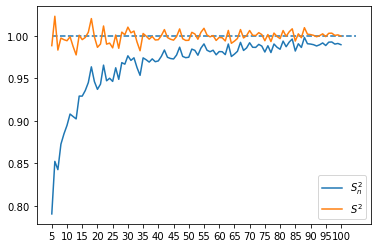

In [3]:
plt.plot(var0, label = "$S^2_n$")
plt.plot(var1, label = "$S^2$")
plt.xticks(ticks=np.arange(0, len_n_vec, 5), labels=np.arange(5, 101, 5))
plt.hlines(xmin=0, xmax=100, y=1, linestyle="--")
plt.legend()
plt.show()

In [49]:
# Znana średnia

def var_knownmean(x, ddof = 0, *args):
    mu = x.mean()
    if args:
        mu = args[0]
    return sum(abs(x - mu)**2) / (len(x) - ddof)

In [56]:
N = 1000

n_vec = np.arange(5, 101, 1) # n - licznosci probki od 5 do 100
len_n_vec = len(n_vec)
var0, var1 = np.zeros(len_n_vec), np.zeros(len_n_vec)

for k, n in enumerate(n_vec):
    var0_vec, var1_vec = np.zeros(N), np.zeros(N)
    for i in range(N):
        x = stats.norm().rvs(size=n)
        var0_vec[i] = var_knownmean(x, 0, 0) # N - ddof = N
        var1_vec[i] = var_knownmean(x, 1, 0) # N - 1
    var0[k] = var0_vec.mean()
    var1[k] = var1_vec.mean()

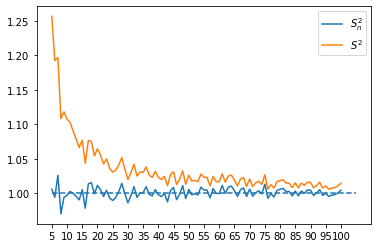

In [57]:
plt.plot(var0, label = "$S^2_n$")
plt.plot(var1, label = "$S^2$")
plt.xticks(ticks=np.arange(0, len_n_vec, 5), labels=np.arange(5, 101, 5))
plt.hlines(xmin=0, xmax=100, y=1, linestyle="--")
plt.legend()
plt.show()

# Estymacja punktowa 

### Zadania
1. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu gamma $\Gamma(\alpha, \beta)$, gdzie $\alpha, \beta>0$. Stosując metodę momentów wyznaczyć estymatory parametrów $\alpha$ i $\beta$.

**Wskazówka**: Pokaż, że $S_n^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 - \overline{X}^2 = M_2 - M_1^2$.

2. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu wykładniczego $\text{Exp}(\lambda)$, gdzie $\lambda>0$. Stosując metodę największej wiarogodności wyznaczyć estymator parametru $\lambda$.


3. W celu oszacowania niezawodności pewnego urządzenia dokonano 10 pomiarów czasu bezawaryjnej pracy tego urządzenia i otrzymano następujące wyniki (w godzinach): 1119,  627,  790,  626, 1477, 1470, 1466, 1027, 1480,  904. Zakładamy, że czas bezawaryjnej pracy tego urządzenia ma rozkład wykładniczy.
    a) Znaleźć estymator funkcji niezawodności tego urządzenia.
    b) Jakie jest prawdopodobieństwo, że dane urządzenie nie ulegnie awarii w ciągu 900 godzin pracy?
    
**Wskazówka**: Funkcja niezawodności: $S(x)=1-F(x)=P(X>x)$.

In [ ]:
#1.
x = 

In [ ]:
#2.

In [6]:
#3.
x = [1119, 627, 790, 626, 1477, 1470, 1466, 1027, 1480, 904]

# lambda_hat = 1 / srednia artymetyczna

lambda_hat = 1 / np.mean(x)
print("Oszacowana wartość parametru lamba na podstawie metody NW: {}".format(lambda_hat))

Oszacowana wartość parametru lamba na podstawie metody NW: 0.0009102494083378847


In [7]:
# T - okreslaja czas bezawaryjnej pracy
# T ~ Exp(lambda = lambda_hat)
# P(T >= 900) = P(T > 900) = 1 - P(X <= 900) = 1 - F(900)

1 - stats.expon(scale = 1 / lambda_hat).cdf(900)

0.4407733560494924